# CASE STUDY 1 : DIABETES

In [170]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler 
from datetime import date
from sklearn.neighbors import LocalOutlierFactor

In [171]:
data=pd.read_csv("datasets//diabetes.csv")
df=data.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 1. DATA EXPLORATION:

In [172]:
def df_check(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(5))
    print("##################### Tail #####################")
    print(dataframe.tail(5))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Describe #####################")
    print(dataframe.describe())
    
df_check(df)

##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### Head #####################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627

In [173]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [175]:
import researchpy as rp

num_cols = df.select_dtypes(include = np.number).columns
rp.summary_cont(df[num_cols]) 

c:\Users\ssbgt\anaconda3\lib\site-packages\researchpy\summary.py:60: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Pregnancies,768.0,3.8451,3.3696,0.1216,3.6064,4.0837
1,Glucose,768.0,120.8945,31.9726,1.1537,118.6297,123.1593
2,BloodPressure,768.0,69.1055,19.3558,0.6984,67.7344,70.4766
3,SkinThickness,768.0,20.5365,15.9522,0.5756,19.4065,21.6664
4,Insulin,768.0,79.7995,115.2440,4.1585,71.6361,87.9629
5,BMI,768.0,31.9926,7.8842,0.2845,31.4341,32.5511
6,DiabetesPedigreeFunction,768.0,0.4719,0.3313,0.0120,0.4484,0.4953
7,Age,768.0,33.2409,11.7602,0.4244,32.4078,34.0739
8,Outcome,768.0,0.3490,0.4770,0.0172,0.3152,0.3827


In [176]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Pregnancies[int64],Mean (sd) : 3.8 (3.4)min < med < max:0.0 < 3.0 < 17.0IQR (CV) : 5.0 (1.1),17 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACiklEQVR4nO3dTW7aQBiA4W9KAPNTWwgJdlygUhcsfYgettvusuAE3IANQkJghBMHY9xNqSqVBPCEMN/kfdaZMYtXQWPPYFOWpQCu+3LvDwBc4uHcHxhjWiLSqDj/rizL54pjgb/eDNUY0+r3+z/CMOxVmXyz2ayMMT+JFbbO/UdthGHYi+P4OYqi7JqJkyQJJpNJb7lcNkSEUGHl7Fe/iEgURdlgMHiqMH+rwhjgPyymoAKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSocNF+1KqKoqiLSGiMqToFR1kgIjcMNU3Tep7n30ejUa1Wq111OuCIoyw4ulmou93uIQiC9ng8zobD4era8Rxlwb9u+tUvItLpdKoeYxHhKAv+YDEFFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSrc/BGqDcvdV+y88oizodruvmLnlV+cDdVm9xU7r/zjbKhHFruv2HnlERZTUIFQoQKhQgVChQqEChUIFSoQKlQgVKjg/A3/e+FlxW4h1BN4WbF7CPU0XlbsGEJ9Ay8rdgeLKahAqFCBUKECoUIFbxdTluetwsPhUL/TtbkHe4KXodqet8rzPCiK4luWZY8ictWqn7Net+FlqLa/dj2bzXrT6bS93+9rH3lt7sG+zstQj6qet1qtVtb3QTnr9b5YTEEFQoUKhAoVCBUqECpU8HrV/xn5uuGbUD3i84ZvQnWM7aPfbrc7iON449uGb0J1yHs9+m02m4++PWwgVIfc89GviNuvrb8o1CRJgmsn3m63gYhImqbBYrFof+R4rdc+jrVV5drz+fyr7Wvr1+v11hjzS0SqjH8py/LVcb8BIYduc82dKcAAAAAASUVORK5CYII="">",0(0.0%)
2,Glucose[int64],Mean (sd) : 120.9 (32.0)min < med < max:0.0 < 117.0 < 199.0IQR (CV) : 41.2 (3.8),136 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACrElEQVR4nO3dMY7aQBSA4TdhITZEtoAEOi4QiYKSPm0OmyOkoEhDww3oEBYywsHBGFJtlI02S/DY2nmT/6vX2MW/rOx94zHX61UA17157QsA/sXDa1+Aj4wxoYh0Kh5+ul6vxzqvxweEWjNjTDgcDj9HUdSvcvx+v98ZY74Q61OEWr9OFEX9+Xx+jOM4v+fANE2DxWLRT5KkIyKE+htCbUgcx/loNPpe4dCw9ovxADdTUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIF/tfvmLIs2yISGWOqfoSXY4KE6pAsy9pFUUwnk0mr1WrdNXn1yNcxQUJ1yOl0egiCoDubzfLxeLy793ifxwQJ9S8spvSjy+XStjl3r9erOiIo4umYIKE+w2ZKvyiKoCzLj3mefxWRqrHhD4T6vMpT+uv1ur9arbrn87nV1MX9jwj1BVWm9He7nZd/el8bz1GhAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKjAPKpnLFexOruClVA9YruK1eUVrITqEZtVrK6vYCVUD1msYnV2GQ03U1CBUKECoUIFQoUKhAoVCBUqECpUIFSowAN//OLy264JFSLi/tuuCRUi4v7brgkVT9i87bosy0gaGjEkVNSi6RFDQkUtmh4xJFTUqqkRQ56jQgVvv1Ettt8RqWELHtTLy1Bttt8RYQseF3kZqlhsvyPCFjwu8jVUEam2/Y4IW/C4iJspqECoUIFQoQKhQoWbN1OWzyOdfZcRdHkxVNvnkbbziRa/JDyw98ytb9ROFEX96XQqYRj+uOeDj8fj2+Vy+SFJkvfGmH2FawsGg8GnOI7f3Xvg4wP77Xb7rcJ55XA4BCIiWZYFm82mq+FYzedO0zS49TM/AdKLX9Vn3NB6AAAAAElFTkSuQmCC"">",0(0.0%)
3,BloodPressure[int64],Mean (sd) : 69.1 (19.4)min < med < max:0.0 < 72.0 < 122.0IQR (CV) : 18.0 (3.6),47 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACr0lEQVR4nO3du47aQBSA4TPhInOJLUCCjheIlILSfdo8bB4hBUVq3oAGISFkhHctjHGabJREm13swWLO8H/9LFP88u6wMx5TlqUArvtw7wkA12jfewI+Msb0RKRbc/ipLMvnW87HB4R6Y8aY3mQy+RqG4ajO+MPhsDfGfCPWvxHq7XXDMBzFcfwcRVFWZWCSJMFyuRztdruuiBDqHwi1IVEUZdPp9KnG0N7NJ+MBFlNQgSeqY4qi6IhIaIyp+yO8XIwRqkPSNO3kef55Pp+3Wq1Wpb9vX/i6GCNUh5xOp3YQBP3FYpHNZrN91fE+L8YI1UGDwaDuQkzE08UYiymoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKvB+1P+wuCsqvFwunVvP59ER6its7orK8zwoiuJTlmXfRaTuy3jxD0J9Xe27otbr9Wi1WvXP53Orqck9IkJ9Q527ovb7vZevJr83FlNQgSeqZyzvqXL2jipC9YjtPVUu31FFqB6xuafK9TuqCNVDFvdUObsQZDEFFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChXe/c+UxU53EYc3OUCXN0O12eku4vYmB+jy3hO19k531zc5QJerNqXU2en+i7ObHKALiymowDY//GZ5OkCkwcWzt6FaflvxcGfzbU8HiDS7ePYyVNtvKx7xbL7N6QCR5hfPTodq87aS4XA4jeP4UPXbCpHHPptvcTpAiqIIpaGDhVeFmiRJUPVTkyQJiqJoS/2JB+Px+EsURcOqA1+eiHme/xCRWr/GRETSNA22222/ypjj8RjcY+y9P3uz2Xxs8mDhT9+QRSk2QaFWAAAAAElFTkSuQmCC"">",0(0.0%)
4,SkinThickness[int64],Mean (sd) : 20.5 (16.0)min < med < max:0.0 < 23.0 < 99.0IQR (CV) : 32.0 (1.3),51 distinct values,"<img src = ""data:image/png;ba

### 2. GRABING NUMERICAL AND CATAGORICAL COLUMNS:

In [177]:
# numeric columns
num_col=[col for col in df.columns if df[col].dtypes in ["float64","int64"]
         and df[col].nunique()>10]
num_col

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [178]:
# categoric columns
cat=[col for col in df.columns if str(df[col].dtypes) in
   ["object","bool","category"]]

In [179]:
# categoric columns looks like numeric
numcat=[col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["float64","int64"]] 
numcat

['Outcome']

In [180]:
# categoric columns with high cardinality
catcar=[col for col in df.columns if df[col].nunique() < 20 and df[col].dtypes in  ["object","bool","category"] ]
catcar

[]

# ANALYZING NUMERICAL AND CATEGORICAL COLUMNS:

In [181]:
# categorical variables :
def cat_summary(df, col_name, plot=False):
   print(pd.DataFrame({col_name: df[col_name].value_counts(),
                         "Ratio": 100 * df[col_name].value_counts() / len(df)}))
   print("##########################################")
   if plot:
         sns.countplot(x=df[col_name], data=df)
         plt.show(block=True)
   print("##########################################")
   print(pd.DataFrame(df.groupby(col_name).agg({"Outcome": ["count", "mean", "sum"]})))
   print("##########################################")

#There is no categorical variable in the data set.
for i in cat:
    cat_summary(df,i,plot=True)

In [182]:
num_col

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

    Pregnancies      Ratio
1           135  17.578125
0           111  14.453125
2           103  13.411458
3            75   9.765625
4            68   8.854167
5            57   7.421875
6            50   6.510417
7            45   5.859375
8            38   4.947917
9            28   3.645833
10           24   3.125000
11           11   1.432292
13           10   1.302083
12            9   1.171875
14            2   0.260417
15            1   0.130208
17            1   0.130208
##########################################


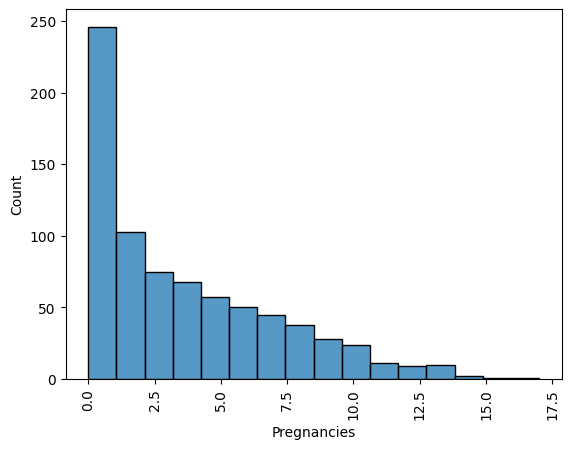

##########################################
     Glucose     Ratio
99        17  2.213542
100       17  2.213542
111       14  1.822917
129       14  1.822917
125       14  1.822917
106       14  1.822917
112       13  1.692708
108       13  1.692708
95        13  1.692708
105       13  1.692708
102       13  1.692708
122       12  1.562500
109       12  1.562500
117       11  1.432292
124       11  1.432292
90        11  1.432292
107       11  1.432292
128       11  1.432292
120       11  1.432292
119       11  1.432292
##########################################


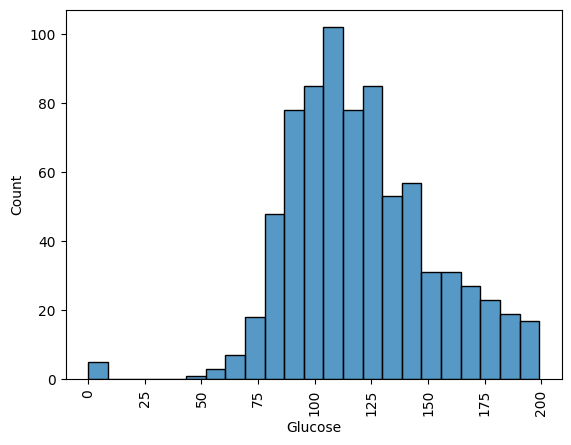

##########################################
    BloodPressure     Ratio
70             57  7.421875
74             52  6.770833
78             45  5.859375
68             45  5.859375
72             44  5.729167
64             43  5.598958
80             40  5.208333
76             39  5.078125
60             37  4.817708
0              35  4.557292
62             34  4.427083
66             30  3.906250
82             30  3.906250
88             25  3.255208
84             23  2.994792
90             22  2.864583
86             21  2.734375
58             21  2.734375
50             13  1.692708
56             12  1.562500
##########################################


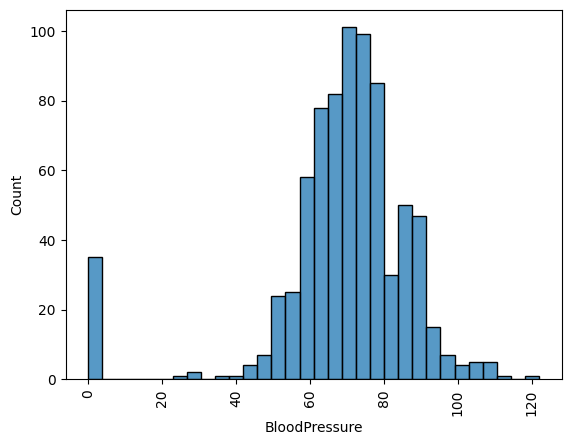

##########################################
    SkinThickness      Ratio
0             227  29.557292
32             31   4.036458
30             27   3.515625
27             23   2.994792
23             22   2.864583
33             20   2.604167
28             20   2.604167
18             20   2.604167
31             19   2.473958
19             18   2.343750
39             18   2.343750
29             17   2.213542
40             16   2.083333
25             16   2.083333
26             16   2.083333
22             16   2.083333
37             16   2.083333
41             15   1.953125
35             15   1.953125
36             14   1.822917
##########################################


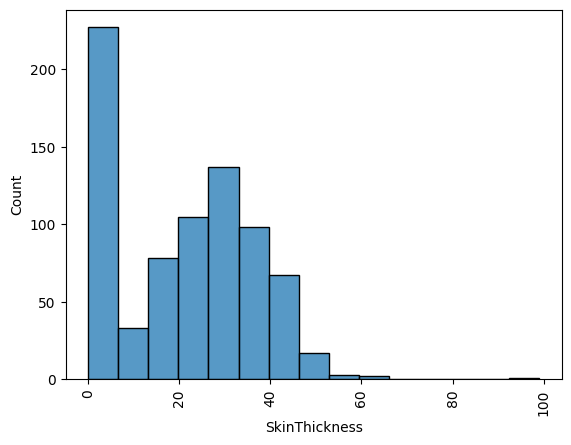

##########################################
     Insulin      Ratio
0        374  48.697917
105       11   1.432292
130        9   1.171875
140        9   1.171875
120        8   1.041667
94         7   0.911458
180        7   0.911458
100        7   0.911458
135        6   0.781250
115        6   0.781250
110        6   0.781250
66         5   0.651042
56         5   0.651042
49         5   0.651042
76         5   0.651042
210        5   0.651042
54         4   0.520833
71         4   0.520833
160        4   0.520833
190        4   0.520833
##########################################


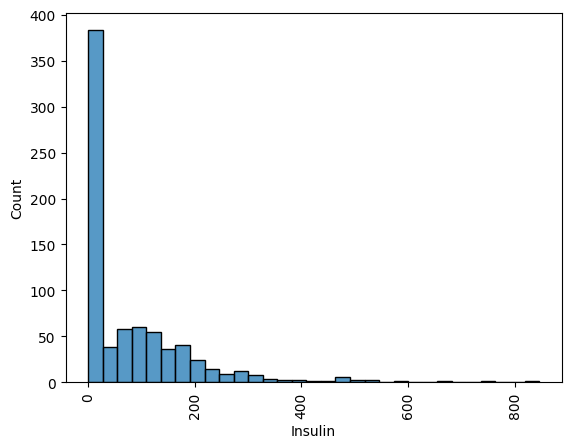

##########################################
      BMI     Ratio
32.0   13  1.692708
31.6   12  1.562500
31.2   12  1.562500
0.0    11  1.432292
32.4   10  1.302083
33.3   10  1.302083
30.1    9  1.171875
32.8    9  1.171875
32.9    9  1.171875
30.8    9  1.171875
33.6    8  1.041667
34.2    8  1.041667
29.7    8  1.041667
33.2    7  0.911458
35.5    7  0.911458
30.0    7  0.911458
27.6    7  0.911458
25.9    7  0.911458
30.5    7  0.911458
28.7    7  0.911458
##########################################


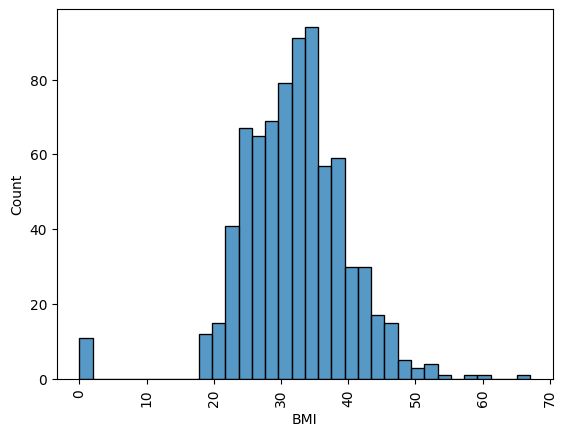

##########################################
       DiabetesPedigreeFunction     Ratio
0.258                         6  0.781250
0.254                         6  0.781250
0.268                         5  0.651042
0.207                         5  0.651042
0.261                         5  0.651042
0.259                         5  0.651042
0.238                         5  0.651042
0.190                         4  0.520833
0.263                         4  0.520833
0.299                         4  0.520833
0.692                         4  0.520833
0.270                         4  0.520833
0.551                         4  0.520833
0.304                         4  0.520833
0.237                         4  0.520833
0.197                         4  0.520833
0.284                         4  0.520833
0.687                         4  0.520833
0.167                         4  0.520833
0.260                         4  0.520833
##########################################


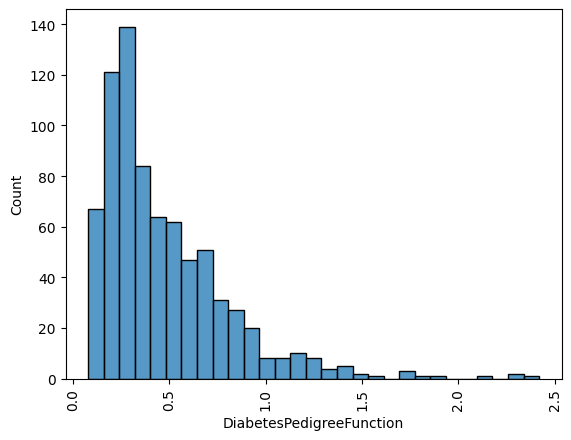

##########################################
    Age     Ratio
22   72  9.375000
21   63  8.203125
25   48  6.250000
24   46  5.989583
23   38  4.947917
28   35  4.557292
26   33  4.296875
27   32  4.166667
29   29  3.776042
31   24  3.125000
41   22  2.864583
30   21  2.734375
37   19  2.473958
42   18  2.343750
33   17  2.213542
38   16  2.083333
36   16  2.083333
32   16  2.083333
45   15  1.953125
34   14  1.822917
##########################################


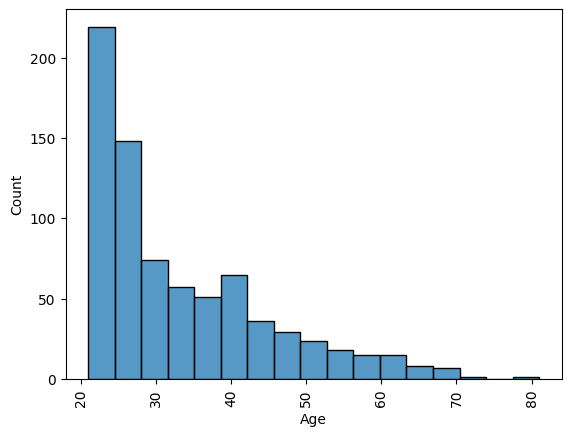

##########################################


In [183]:
# numeric variables
def num_summary(df, col_name, plot=False):
   
   # ilk 20 gözlemi göster
   print(pd.DataFrame({col_name: df[col_name].value_counts().head(20),
                           "Ratio": 100 * df[col_name].value_counts().head(20) / len(df)}))
   print("##########################################")
   if plot:
         sns.histplot(x=df[col_name], data=df)
         plt.xticks(rotation=90)
         plt.show(block=True)
   print("##########################################")

for col in num_col :
    num_summary(df,col,plot=True)

### TARGET VARIABLE ANALYSIS:


In [184]:
# There is no categorical variable in the data set.

#Numeric variables:
num_col=[col for col in df.columns if df[col].dtypes in ["float64","int64"]
         and df[col].nunique()>10]
num_col

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [185]:
for i in num_col:
   a=pd.DataFrame(df.groupby(i).agg({"Outcome": ["count", "mean", "sum"]})).head(20).sort_values(by=("Outcome","count"),
                                                                                                        ascending=False)
   print(a)
   print("##########################################")

            Outcome              
              count      mean sum
Pregnancies                      
1               135  0.214815  29
0               111  0.342342  38
2               103  0.184466  19
3                75  0.360000  27
4                68  0.338235  23
5                57  0.368421  21
6                50  0.320000  16
7                45  0.555556  25
8                38  0.578947  22
9                28  0.642857  18
10               24  0.416667  10
11               11  0.636364   7
13               10  0.500000   5
12                9  0.444444   4
14                2  1.000000   2
15                1  1.000000   1
17                1  1.000000   1
##########################################
        Outcome              
          count      mean sum
Glucose                      
81            6  0.000000   0
80            6  0.166667   1
0             5  0.400000   2
74            4  0.000000   0
78            4  0.250000   1
71            4  0.000000   0
73     

### OUTLIER ANALYSIS:

In [186]:
for i in num_col:
    fig=px.box(df,y=i,color="Outcome",template="plotly_dark",title=i)
    fig.show()
    

In [187]:
# outlier detection function:

# outlier threshold function:
def outlier_thresholds(dataframe,col_name,q1=0.25,q3=0.75):
    q1=dataframe[col_name].quantile(q1)
    q3=dataframe[col_name].quantile(q3)
    IQR=q3-q1
    
    up_limit=q3+1.5*IQR
    low_limit=q1-1.5*IQR
    
    return low_limit,up_limit


# check outliers function:
def check_outliers(dataframe,col_name):
    low_limit,up_limit=outlier_thresholds(dataframe,col_name)
    if dataframe[(dataframe[col_name]<low_limit) | (dataframe[col_name]>up_limit)].any(axis=None):
        return True 
   
    else:
        return False

for col in num_col:
    print(col,check_outliers(df,col))

Pregnancies True
Glucose True
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age True


In [188]:
    
# aykırı değerlere erişmek için:

def grab_outliers(dataframe,cols, index=False):

    low, up = outlier_thresholds(dataframe, cols)
    
    if dataframe[(dataframe[cols] < low) | (dataframe[cols] > up)].shape[0] > 10:
        print(dataframe[(dataframe[cols] < low) | (dataframe[cols] > up)].head(5))
        
    else:
        print(dataframe[(dataframe[cols] < low) | (dataframe[cols] > up)])
        
    if index:
        outlier_index = dataframe[(dataframe[cols] < low) | (dataframe[cols] > up)].index
        return outlier_index
    
    

for col in num_col:
    grab_outliers(df,col,index=True)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
88            15      136             70             32      110  37.1   
159           17      163             72             41      114  40.9   
298           14      100             78             25      184  36.6   
455           14      175             62             30        0  33.6   

     DiabetesPedigreeFunction  Age  Outcome  
88                      0.153   43        1  
159                     0.817   47        1  
298                     0.412   46        1  
455                     0.212   38        1  
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1        0             48             20        0  24.7   
182            1        0             74             20       23  27.7   
342            1        0             68             35        0  32.0   
349            5        0             80             32        0  41.0   
502            6        0    

In [189]:
# fill outliers with thresholds:
def replace_with_thresholds(dataframe, col):
    low_limit, up_limit = outlier_thresholds(dataframe, col)
    if low_limit > 0:
        dataframe.loc[(dataframe[col] < low_limit), col] = low_limit
        dataframe.loc[(dataframe[col] > up_limit), col] = up_limit
    else:
        dataframe.loc[(dataframe[col] > up_limit), col] = up_limit
    
for col in num_col:
    replace_with_thresholds(df,col)
    

print("After filling with thresholds:")
for col in num_cols:
    print(col,check_outliers(df,col))
print(df.shape)

After filling with thresholds:
Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False
Outcome False
(768, 9)


### MISSING VALUE ANALYSIS:

In [190]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [191]:
# show the missing values in dataset with ratio
def missing_values_tabl(df):
    
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio,2)], axis=1, keys=['n_miss', 'ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

missing_values_tabl(df)

,n_miss,ratio


* THERE IS NO MISSING VALUE IN THE DATASET.

### CORRELATION ANALYSIS:

In [192]:
corr=df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128987,0.184307,-0.084349,-0.077793,0.024681,-0.017398,0.549695,0.220392
Glucose,0.128987,1.000000,0.197865,0.059806,0.315856,0.235542,0.120213,0.269056,0.479158
BloodPressure,0.184307,0.197865,1.000000,0.152644,0.050080,0.282544,0.038793,0.304208,0.113301
SkinThickness,-0.084349,0.059806,0.152644,1.000000,0.488101,0.401494,0.177920,-0.119170,0.073125
Insulin,-0.077793,0.315856,0.050080,0.488101,1.000000,0.209665,0.190087,-0.065547,0.124721
BMI,0.024681,0.235542,0.282544,0.401494,0.209665,1.000000,0.141087,0.043375,0.309739
DiabetesPedigreeFunction,-0.017398,0.120213,0.038793,0.177920,0.190087,0.141087,1.000000,0.047289,0.184969
Age,0.549695,0.269056,0.304208,-0.119170,-0.065547,0.043375,0.047289,1.000000,0.242702
Outcome,0.220392,0.479158,0.113301,0.073125,0.124721,0.309739,0.184969,0.242702,1.000000


Text(0.5, 1.0, 'Correlation Between Features')

<Figure size 2000x1000 with 0 Axes>

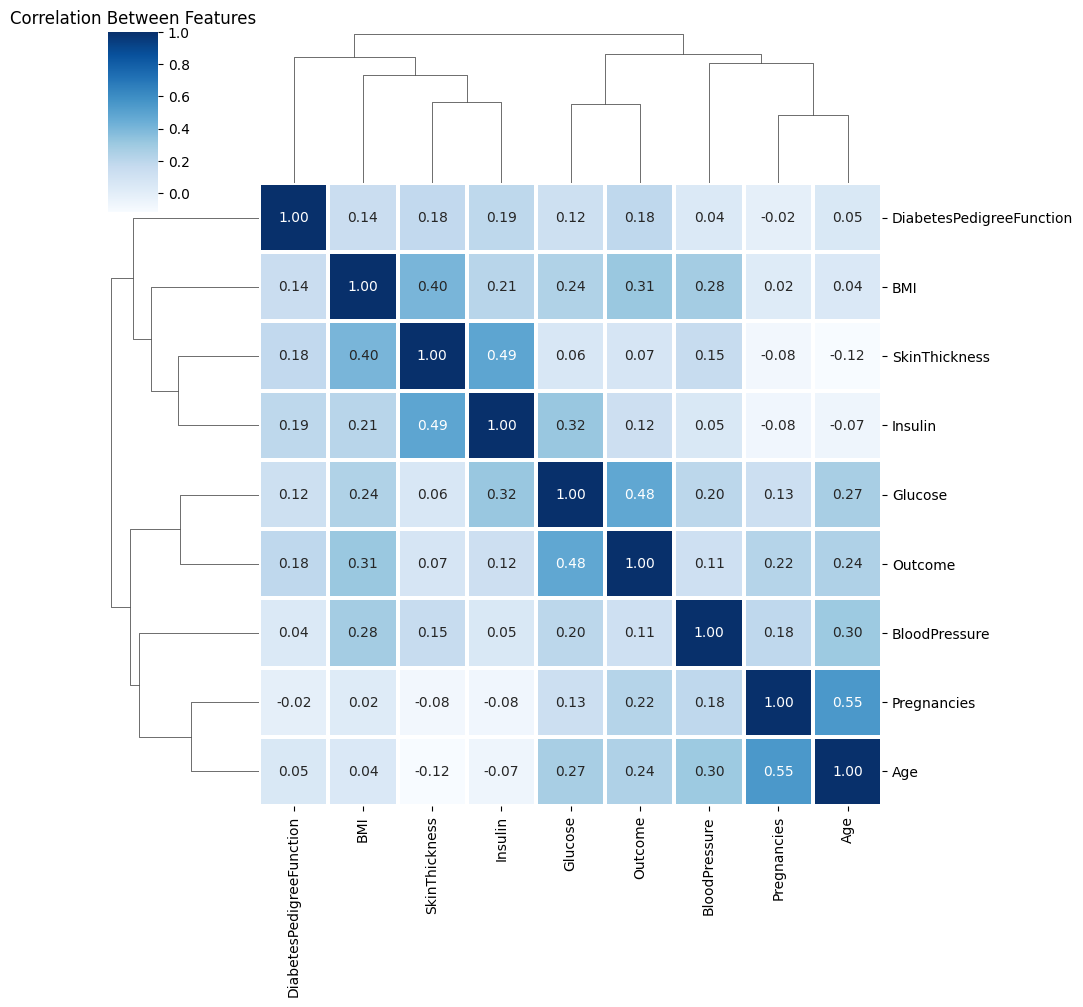

In [193]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.clustermap(corr,fmt=".2f",cmap="Blues",annot=True,linewidths=1.5,)
plt.title("Correlation Between Features")

# FEATURE ENGINEERING:



In [194]:
features=df.drop(["Outcome","Pregnancies"],axis=1) 

# show the features that have 0 values
for i in features:
    print(i+":",df[df[i]==0][i].count())

Glucose: 0
BloodPressure: 0
SkinThickness: 227
Insulin: 374
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0


In [195]:
# fill the 0 values with nan values

df["SkinThickness"]=df["SkinThickness"].replace(0,np.nan)
df["Insulin"]=df["Insulin"].replace(0,np.nan)

for i in features:
    print(i+":",df[df[i]==0][i].count())

Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0


In [196]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [197]:
var=["SkinThickness","Insulin"]

from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=5)
dff=pd.DataFrame(knn.fit_transform(df[var]),columns=df[var].columns)

dff.isnull().sum()

df["SkinThickness"]=dff["SkinThickness"]
df["Insulin"]=dff["Insulin"]
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,35.000000,189.025000,33.6,0.627,50.0,1
1,1.0,85.0,66,29.000000,140.600000,26.6,0.351,31.0,0
2,8.0,183.0,64,29.118299,143.566624,23.3,0.672,32.0,1
3,1.0,89.0,66,23.000000,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40,35.000000,168.000000,43.1,1.200,33.0,1


In [198]:
# feature scaling:

from sklearn.preprocessing import MinMaxScaler
rb=RobustScaler()


X=df.drop("Outcome",axis=1).values
y=df["Outcome"].values.reshape(-1,1)

rb.fit_transform(X)

# train test split:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [202]:
# Model building:

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,f1_score,precision_score,recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)


# MODELING:

knn=KNeighborsClassifier()
svc=SVC()
nb=GaussianNB()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
lgb=LGBMClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
lr=LogisticRegression()

models = [knn, svc, nb, dtc, rfc, xgb, lgb, gbc, abc, lr]
overral=pd.DataFrame(columns=["Model","Accuracy Score","F1 Score","ROC AUC Score","R2 Score",
                              "Cross Val Score","RMSE","MAE","MSE","precision_score","recall_score"])
for model in models:
    
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    roc=roc_auc_score(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    cv=cross_val_score(model,X,y,cv=10).mean()
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    pr=precision_score(y_test,y_pred)
    rc=recall_score(y_test,y_pred)
    
    overral=overral.append({"Model":model.__class__.__name__,
                            "Accuracy Score":acc,
                            "F1 Score":f1,
                            "ROC AUC Score":roc,
                            "R2 Score":r2,
                            "Cross Val Score":cv,
                            "RMSE":rmse,
                            "MAE":mae,
                            "MSE":mse,
                            "precision_score":pr,
                            "recall_score":rc},ignore_index=True)
    

overral=overral.sort_values(by="Accuracy Score",ascending=False)
overral=overral.style.background_gradient(cmap="viridis")
overral

,Model,Accuracy Score,F1 Score,ROC AUC Score,R2 Score,Cross Val Score,RMSE,MAE,MSE,precision_score,recall_score
1,SVC,0.766234,0.640000,0.725253,-0.018182,0.765653,0.483494,0.233766,0.233766,0.711111,0.581818
9,LogisticRegression,0.766234,0.678571,0.749495,-0.018182,0.763038,0.483494,0.233766,0.233766,0.666667,0.690909
7,GradientBoostingClassifier,0.746753,0.677686,0.746465,-0.103030,0.748735,0.503236,0.253247,0.253247,0.621212,0.745455
4,RandomForestClassifier,0.740260,0.642857,0.721212,-0.131313,0.752614,0.509647,0.259740,0.259740,0.631579,0.654545
6,LGBMClassifier,0.733766,0.649573,0.724242,-0.159596,0.742242,0.515978,0.266234,0.266234,0.612903,0.690909
8,AdaBoostClassifier,0.733766,0.630631,0.712121,-0.159596,0.740960,0.515978,0.266234,0.266234,0.625000,0.636364
2,GaussianNB,0.727273,0.644068,0.719192,-0.187879,0.747454,0.522233,0.272727,0.272727,0.603175,0.690909
3,DecisionTreeClassifier,0.720779,0.650407,0.722222,-0.216162,0.705742,0.528413,0.279221,0.279221,0.588235,0.727273
5,XGBClassifier,0.720779,0.632479,0.710101,-0.216162,0.748650,0.528413,0.279221,0.279221,0.596774,0.672727
0,KNeighborsClassifier,0.681818,0.601626,0.679798,-0.385859,0.727888,0.564076,0.318182,0.318182,0.544118,0.672727
